## ABOUT

    The Big Mart Sales Regression Analysis Project delves into the realm of predictive analytics by harnessing the power 
    of data to uncover valuable insights within the retail industry. By utilizing datasets available from the provided 
    website, specifically the "Big Mart Sales Prediction Datasets," this project aims to construct a comprehensive 
    regression model that accurately forecasts sales figures for various products across different store outlets. 

## SOURCE 

    Website: https://pulsepittsburgh.com/datasets/shivan118/big-mart-sales-prediction-datasets
    
    The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities.

## IMPORTING LIBRARIES

In [1]:
import warnings
%matplotlib inline
import numpy as np
import pandas as pd 
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt 
from xgboost import XGBRegressor
from sklearn.utils import shuffle
warnings.filterwarnings ( 'ignore' )
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
pd.set_option ( "display.max_columns" , None )
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeRegressor
from statsmodels.stats.diagnostic import het_breuschpagan
from sklearn.linear_model import LinearRegression , Lasso , Ridge 
from sklearn.model_selection import train_test_split , GridSearchCV , cross_val_score
from sklearn.ensemble import RandomForestRegressor , GradientBoostingRegressor , ExtraTreesRegressor , AdaBoostRegressor 
from sklearn.metrics import r2_score , mean_absolute_error , mean_absolute_percentage_error , mean_squared_error , accuracy_score
from sklearn.preprocessing import LabelEncoder , OneHotEncoder , Normalizer , MinMaxScaler , StandardScaler , QuantileTransformer

## IMPORTING DATA

In [2]:
Train = pd.read_csv ( "Train.csv" )
Test = pd.read_csv ( "Test.csv" )
display ( Train )
display ( Test )

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


## STATISTICAL ANALYSIS

### DATA DESCRIPTION 

In [3]:
Train.info ( )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [4]:
Test.info ( )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


### STATISTICAL SUMMARY 

In [5]:
Train.describe ( )

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [6]:
Train.describe ( exclude = np.number )

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,6113,8523,8523
unique,1559,5,16,10,3,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5089,1232,935,2793,3350,5577


In [7]:
Test.describe ( )

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [8]:
Test.describe ( exclude = np.number )

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,5681,5681,5681,5681,4075,5681,5681
unique,1543,5,16,10,3,3,4
top,DRF48,Low Fat,Snack Foods,OUT027,Medium,Tier 3,Supermarket Type1
freq,8,3396,789,624,1862,2233,3717


## DATA PREPROCESSING 

### DETECTING NULL VALUES

In [9]:
Train.isnull ( ).sum ( ) [ Train.isnull ( ).sum ( ) > 0 ]

Item_Weight    1463
Outlet_Size    2410
dtype: int64

In [10]:
Test.isnull ( ).sum ( ) [ Train.isnull ( ).sum ( ) > 0 ]

Item_Weight     976
Outlet_Size    1606
dtype: int64

### FILLING NULL VALUES

In [11]:
Mean = SimpleImputer ( strategy = 'mean' )
Mode = SimpleImputer ( strategy = 'most_frequent' )
Train.Item_Weight = Mean.fit_transform ( Train [ [ 'Item_Weight' ] ] )
Test.Item_Weight = Mean.fit_transform ( Test [ [ 'Item_Weight' ] ] )

Train.Outlet_Size = pd.DataFrame(Mode.fit_transform ( Train [ [ 'Outlet_Size' ] ] ))
Test.Outlet_Size = pd.DataFrame(Mode.fit_transform ( Test [ [ 'Outlet_Size' ] ] ))

### DROPPING UNIQUE COLUMNS

In [12]:
Train.drop ( columns = [ 'Item_Identifier' ] , inplace = True )
# Test.drop ( columns = [ 'Item_Identifier' ] , inplace = True )

## CATEGORICAL COLUMNS

In [13]:
for i in Train.select_dtypes ( 'object' ) :
    print ( "\n-----------------------------------------------\n" )
    display ( Train [ i ].value_counts ( ) )


-----------------------------------------------



Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64


-----------------------------------------------



Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64


-----------------------------------------------



Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: count, dtype: int64


-----------------------------------------------



Outlet_Size
Medium    5203
Small     2388
High       932
Name: count, dtype: int64


-----------------------------------------------



Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: count, dtype: int64


-----------------------------------------------



Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: count, dtype: int64

In [14]:
def Small_Case ( DF ) :
    for i in DF.select_dtypes ( 'object' ) :
        DF [ i ] = DF [ i ].str.title ( )
    return DF 

Small_Case ( Train )
Small_Case ( Test )
Train.Item_Fat_Content.replace ( { 'Lf' : 'Low Fat' , 'Reg' : 'Regular' } , inplace = True )
Test.Item_Fat_Content.replace ( { 'Lf' : 'Low Fat' , 'Reg' : 'Regular' } , inplace = True )

### TREATING OUTLIERS

In [15]:
def Outliers_Treatment ( DF , Columns ) : # Columns : List
    for i in Columns : 
        print ( "The quantiles of the column {} before outlier treatment is : \n".format ( i ) )
        display ( DF [ i ].describe ( ) )
        print ( "\n" )

        Lower_Limit = DF [ i ].quantile ( 0.09 )

        Upper_Limit = DF [ i ].quantile ( 0.90 )

        DF [ i ] = DF [ i ].apply ( lambda x : Lower_Limit if x <= Lower_Limit else ( Upper_Limit if x >= Upper_Limit else x ) )

        print ( "The quantiles of the column {} after outlier treatment is : \n".format ( i ) )

        display ( DF [ i ].describe ( ) )
        
        print ( "\n-----------------------------------------------------------------------------------\n" )
                

In [16]:
Outliers_Treatment ( Train , [ 'Item_Visibility' , 'Item_Outlet_Sales' ] )
Outliers_Treatment ( Test , [ 'Item_Visibility' ] )

The quantiles of the column Item_Visibility before outlier treatment is : 



count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64



The quantiles of the column Item_Visibility after outlier treatment is : 



count    8523.000000
mean        0.063295
std         0.042169
min         0.010633
25%         0.026989
50%         0.053931
75%         0.094585
max         0.139514
Name: Item_Visibility, dtype: float64


-----------------------------------------------------------------------------------

The quantiles of the column Item_Outlet_Sales before outlier treatment is : 



count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64



The quantiles of the column Item_Outlet_Sales after outlier treatment is : 



count    8523.000000
mean     2065.334489
std      1391.873972
min       311.594400
25%       834.247400
50%      1794.331000
75%      3101.296400
max      4570.051200
Name: Item_Outlet_Sales, dtype: float64


-----------------------------------------------------------------------------------

The quantiles of the column Item_Visibility before outlier treatment is : 



count    5681.000000
mean        0.065684
std         0.051252
min         0.000000
25%         0.027047
50%         0.054154
75%         0.093463
max         0.323637
Name: Item_Visibility, dtype: float64



The quantiles of the column Item_Visibility after outlier treatment is : 



count    5681.000000
mean        0.062511
std         0.040880
min         0.010619
25%         0.027047
50%         0.054154
75%         0.093463
max         0.135768
Name: Item_Visibility, dtype: float64


-----------------------------------------------------------------------------------



## FEATURE SCALING  

In [17]:
Train [ 'Outlet_Establishment_Year' ] = Train [ 'Outlet_Establishment_Year' ].astype ( 'object' )

Test [ 'Outlet_Establishment_Year' ] = Test [ 'Outlet_Establishment_Year' ].astype ( 'object' )

def Log_Transformation ( DF , Columns ) :
    
    for i in Columns :
        
        DF [ i ] = np.log ( DF [ i ] )
        
Log_Transformation ( Test , ['Item_Weight', 'Item_Visibility', 'Item_MRP'] )

Log_Transformation ( Train , ['Item_Weight', 'Item_Visibility', 'Item_MRP' , 'Item_Outlet_Sales'] )

In [18]:
print(Train.shape)
print(Test.shape)

(8523, 11)
(5681, 11)


In [19]:
test_v1=Test.copy()
test_v1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,Fdw58,3.032546,Low Fat,-4.545069,Snack Foods,4.680854,Out049,1999,Medium,Tier 1,Supermarket Type1
1,Fdw14,2.116256,Regular,-3.258977,Dairy,4.469577,Out017,2007,Medium,Tier 2,Supermarket Type1
2,Ncn55,2.681022,Low Fat,-2.306845,Others,5.487920,Out010,1998,Medium,Tier 3,Grocery Store
3,Fdq58,1.989927,Low Fat,-4.174142,Snack Foods,5.043644,Out017,2007,Medium,Tier 2,Supermarket Type1
4,Fdy38,2.541258,Regular,-2.132005,Dairy,5.456304,Out027,1985,Medium,Tier 3,Supermarket Type3


## RANDOM SAMPLING

In [20]:
from sklearn.utils import shuffle

Train = shuffle ( Train, random_state = 42 )
Train.reset_index ( drop = True , inplace = True )

Test = shuffle ( Test , random_state = 42 )
Test.reset_index ( drop = True , inplace = True )

Train_X = Train.iloc [ : , 0 : -1 ]

Train_Y = Train.Item_Outlet_Sales

Test_X = Test

N = Train_X.shape[0] 
P = Train_X.shape[1]

print ( "The dimensions of the data frames is as follows : \n" )

print ( "Train : {}\n\nTrain_X : {}\n\nTrain_Y : {}\n\nTest_X : {}".format ( Train.shape , Train_X.shape , Train_Y.shape , Test.shape ) )

The dimensions of the data frames is as follows : 

Train : (8523, 11)

Train_X : (8523, 10)

Train_Y : (8523,)

Test_X : (5681, 11)


In [21]:
test_v2=Test.copy()
test_v2.head()
sub_file=test_v2[['Item_Identifier','Outlet_Identifier']]
Test.drop ( columns = [ 'Item_Identifier' ] , inplace = True )

## PREDICTIVE MODELING

### RANDOM FOREST

In [22]:
Columns = list ( Train.select_dtypes ( 'object' ) )
LE = LabelEncoder ( )

Train_X_RF = Train_X
Test_X_RF = Test_X

Train_X_RF.loc [ : , Columns ] = Train_X_RF.loc [ : , Columns ].apply ( LE.fit_transform )
Test_X_RF.loc [ : , Columns ] = Test_X_RF.loc [ : , Columns ].apply ( LE.fit_transform )

In [23]:
RF = RandomForestRegressor (n_estimators=200,max_depth=34,oob_score=True )

RF.fit ( Train_X_RF , Train_Y )
Train_Y_RF = RF.predict ( Train_X_RF )

Y_RF = RF.predict ( Test_X_RF )
R2_RF_Train = r2_score ( Train_Y , Train_Y_RF ) * 100 

print ( "The R2 value of the Training Data is : " , np.round ( R2_RF_Train , 2 ) , "%\n" )
Adjusted_R2_RF = ( 1 - ( ( 1 - ( R2_RF_Train / 100 ) ) * ( N - 1 ) / ( N - 1 - P ) ) )* 100

print ( "\nThe Adjusted R2 value of training data is : " , np.round ( Adjusted_R2_RF , 2 ) , "%\n" )

The R2 value of the Training Data is :  95.55 %


The Adjusted R2 value of training data is :  95.55 %



In [24]:
MSE_RF = mean_squared_error ( Train_Y , Train_Y_RF )
RMSE_RF = np.sqrt ( MSE_RF )

MAPE_RF = mean_absolute_percentage_error ( Train_Y , Train_Y_RF ) * 100
MAE_RF = mean_absolute_error ( Train_Y , Train_Y_RF )

print ( "The Mean Squared Error of Training Data is , MSE : " , np.round ( MSE_RF , 2 ) )
print ( "\nThe Root Mean Squared Error of Training Data is , RMSE : " , np.round ( RMSE_RF , 2 ) )

print ( "\nThe Mean Absolute Percentage Error of Training Data is , MAPE : " , np.round ( MAPE_RF , 2 ) )
print ( "\nThe Mean Absolute Error of Training Data is , MAE : " , np.round ( MAE_RF , 2 ) )  

The Mean Squared Error of Training Data is , MSE :  0.03

The Root Mean Squared Error of Training Data is , RMSE :  0.18

The Mean Absolute Percentage Error of Training Data is , MAPE :  1.89

The Mean Absolute Error of Training Data is , MAE :  0.14


In [25]:
Y_RF = pd.DataFrame ( { 'Item_Outlet_Sales' : Y_RF } ) 
# Test = pd.concat ( [ Test_X_RF ,  Y_RF ] , axis = 1 ) 
Test = pd.concat ( [ test_v2 ,  Y_RF ] , axis = 1 ) 
for i in Test.select_dtypes ( np.number ):
    Test[i] = np.exp ( Test [ i ] )
    
Test 

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,Fdh26,19.250000,Regular,0.034896,Canned,141.0496,Out017,2007,Medium,Tier 2,Supermarket Type1,1615.594596
1,Nca17,12.695633,Low Fat,0.045198,Health And Hygiene,150.2392,Out027,1985,Medium,Tier 3,Supermarket Type3,3088.524620
2,Fdz13,7.840000,Regular,0.135768,Canned,51.9350,Out049,1999,Medium,Tier 1,Supermarket Type1,948.868996
3,Fdc03,8.575000,Regular,0.120256,Dairy,196.2794,Out010,1998,Medium,Tier 3,Grocery Store,508.966119
4,Nco55,12.800000,Low Fat,0.091037,Others,108.9938,Out046,1997,Small,Tier 1,Supermarket Type1,1409.463769
...,...,...,...,...,...,...,...,...,...,...,...,...
5676,Fda13,15.850000,Low Fat,0.078555,Canned,38.7506,Out046,1997,Small,Tier 1,Supermarket Type1,557.476352
5677,Fdq47,12.695633,Regular,0.135768,Breads,36.4874,Out027,1985,Medium,Tier 3,Supermarket Type3,914.594414
5678,Drd37,9.800000,Low Fat,0.010619,Soft Drinks,48.0060,Out035,2004,Small,Tier 2,Supermarket Type1,708.941637
5679,Fdb10,10.000000,Low Fat,0.067152,Snack Foods,237.2590,Out013,1987,High,Tier 3,Supermarket Type1,3267.342227


In [26]:
Train_Y_RF_Original = np.exp ( RF.predict ( Train_X_RF ) ) 
Y_RF_Original = np.exp ( RF.predict ( Test_X_RF ) )
R2_RF_Train_Original = r2_score ( np.exp ( Train_Y ) , Train_Y_RF_Original ) * 100 

print ( "The R2 value of the Training Data is : " , np.round ( R2_RF_Train_Original , 2 ) , "%" )

Adjusted_R2_RF_Original = ( 1 - ( ( 1 - ( R2_RF_Train_Original / 100 ) ) * ( N - 1 ) / ( N - 1 - P ) ) )* 100
print ( "\nThe Adjusted R2 value of training data is : " , np.round ( Adjusted_R2_RF_Original , 2 ) , "%\n" ) 
    
MSE_RF_Original = mean_squared_error ( np.exp ( Train_Y ) , Train_Y_RF_Original )
RMSE_RF_Original = np.sqrt ( MSE_RF_Original )

MAPE_RF_Original = mean_absolute_percentage_error ( np.exp( Train_Y ) , Train_Y_RF_Original ) * 100
MAE_RF_Original = mean_absolute_error ( np.exp( Train_Y ) , Train_Y_RF_Original )

print ( "The Mean Squared Error of Training Data is , MSE : " , np.round ( MSE_RF_Original , 2 ) )
print ( "\nThe Root Mean Squared Error of Training Data is , RMSE : " , np.round ( RMSE_RF_Original , 2 ) )

print ( "\nThe Mean Absolute Percentage Error of Training Data is , MAPE : " , np.round ( MAPE_RF_Original , 2 ) )
print ( "\nThe Mean Absolute Error of Training Data is , MAE : " , np.round ( MAE_RF_Original , 2 ) )  

The R2 value of the Training Data is :  93.02 %

The Adjusted R2 value of training data is :  93.01 %

The Mean Squared Error of Training Data is , MSE :  135232.42

The Root Mean Squared Error of Training Data is , RMSE :  367.74

The Mean Absolute Percentage Error of Training Data is , MAPE :  14.0

The Mean Absolute Error of Training Data is , MAE :  259.42


In [27]:
Comparison_RF = pd.DataFrame ( index = [ 'R2_Train' , 'Adjusted_R2' , 'MSE' , 'MAE' , 'MAPE' , 'RMSE' ] )
RF_Transformed = [ R2_RF_Train , Adjusted_R2_RF , MSE_RF , MAE_RF , MAPE_RF , RMSE_RF ]
RF_Original = [ R2_RF_Train_Original , Adjusted_R2_RF_Original , MSE_RF_Original , MAE_RF_Original , MAPE_RF_Original , RMSE_RF_Original ]

Comparison_RF [ "Transformed_Data_Performance" ] = RF_Transformed
Comparison_RF [ "Original_Data_Performance" ] = RF_Original
Comparison_RF [ "Difference" ] = Comparison_RF [ "Transformed_Data_Performance" ] - Comparison_RF [ "Original_Data_Performance" ]

Comparison_RF

,Transformed_Data_Performance,Original_Data_Performance,Difference
R2_Train,95.552248,93.018770,2.533479
Adjusted_R2,95.547023,93.010568,2.536455
MSE,0.032092,135232.422429,-135232.390336
MAE,0.135577,259.424902,-259.289325
MAPE,1.891657,13.998430,-12.106773
RMSE,0.179143,367.739612,-367.560469


#### CHECKING FOR ASSUMPTIONS FOR TRANSFORMED DATA 

##### LINEARITY

In [44]:
plt.figure ( figsize = ( 20 , 10 ) )
sns.regplot ( x = Train_Y , y = Train_Y_RF  , marker = '*', scatter_kws = { 's' : 5 }  , color = '#C08497' )
plt.title ( "Checking For Linearity Between The Training & Predicted Target Variable " )
plt.xlabel ( "Actual Target Values of Total Sales" )
plt.ylabel ( "Predicted Target Values of Total Sales" )

plt.show ( )

: 

##### NORMALITY 

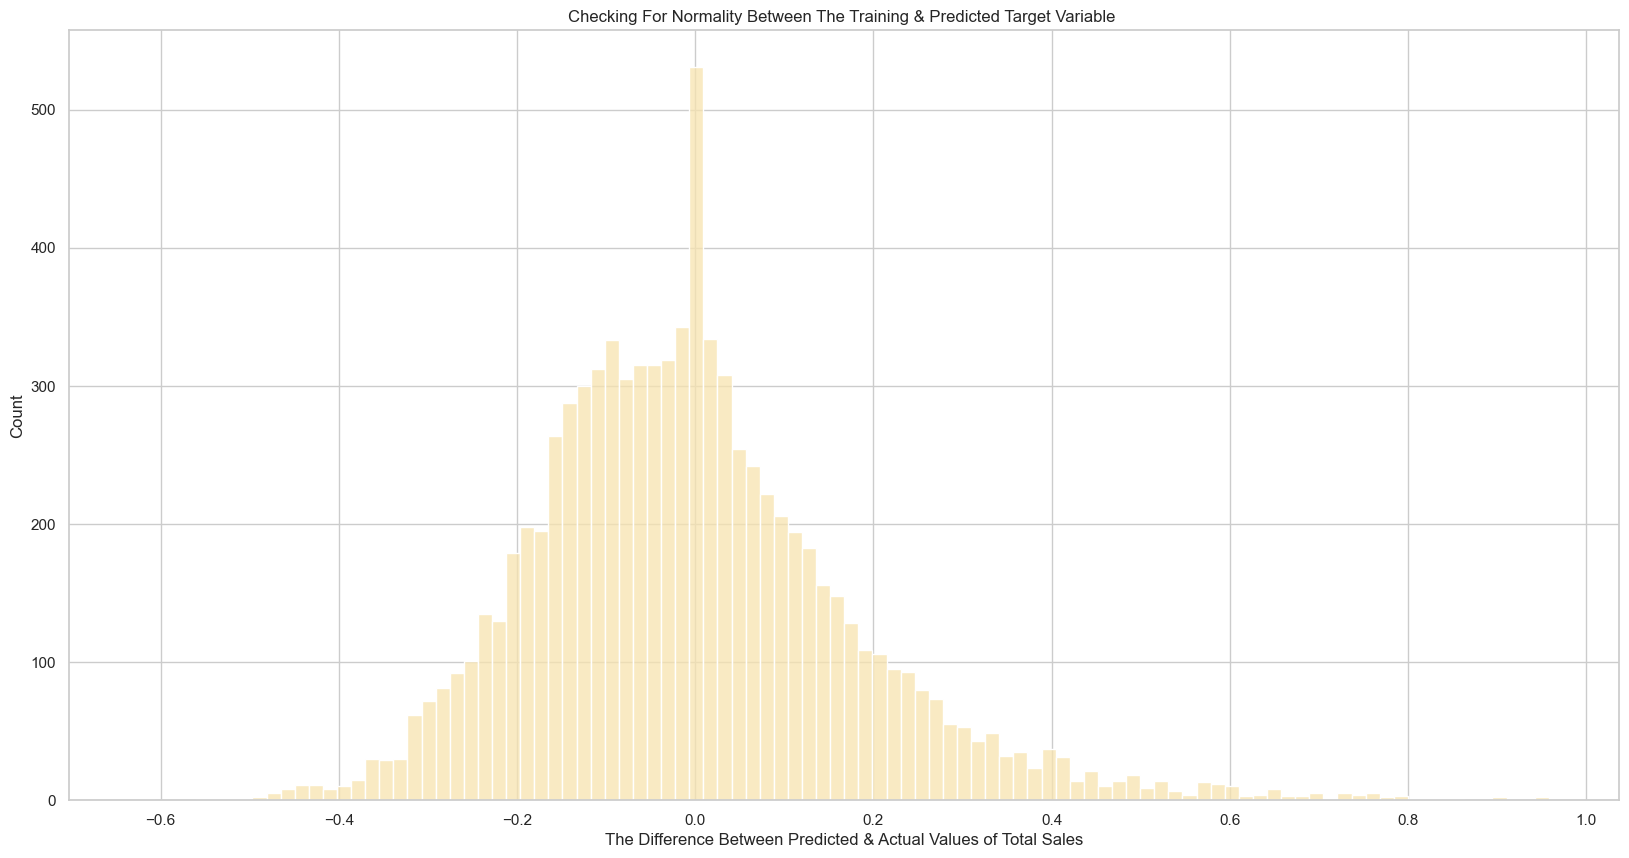

In [ ]:
plt.figure ( figsize = ( 20 , 10 ) )
sns.histplot ( data = ( Train_Y_RF - Train_Y ) , color = '#F7E3AF' , bins = 100 )

plt.title ( "Checking For Normality Between The Training & Predicted Target Variable " )
plt.xlabel ( "The Difference Between Predicted & Actual Values of Total Sales" )

plt.show ( )

In [ ]:
Error_Train = Train_Y_RF - Train_Y

print ( "The skewness value of Train is : ", np.round ( Error_Train.skew ( ) , 2 ) )
print ( "\nThe kurtotis value of Train is : ", np.round ( Error_Train.kurt ( ) + 3 , 2 )  )

The skewness value of Train is :  0.81

The kurtotis value of Train is :  4.77


##### HOMOSCEDASTICITY 

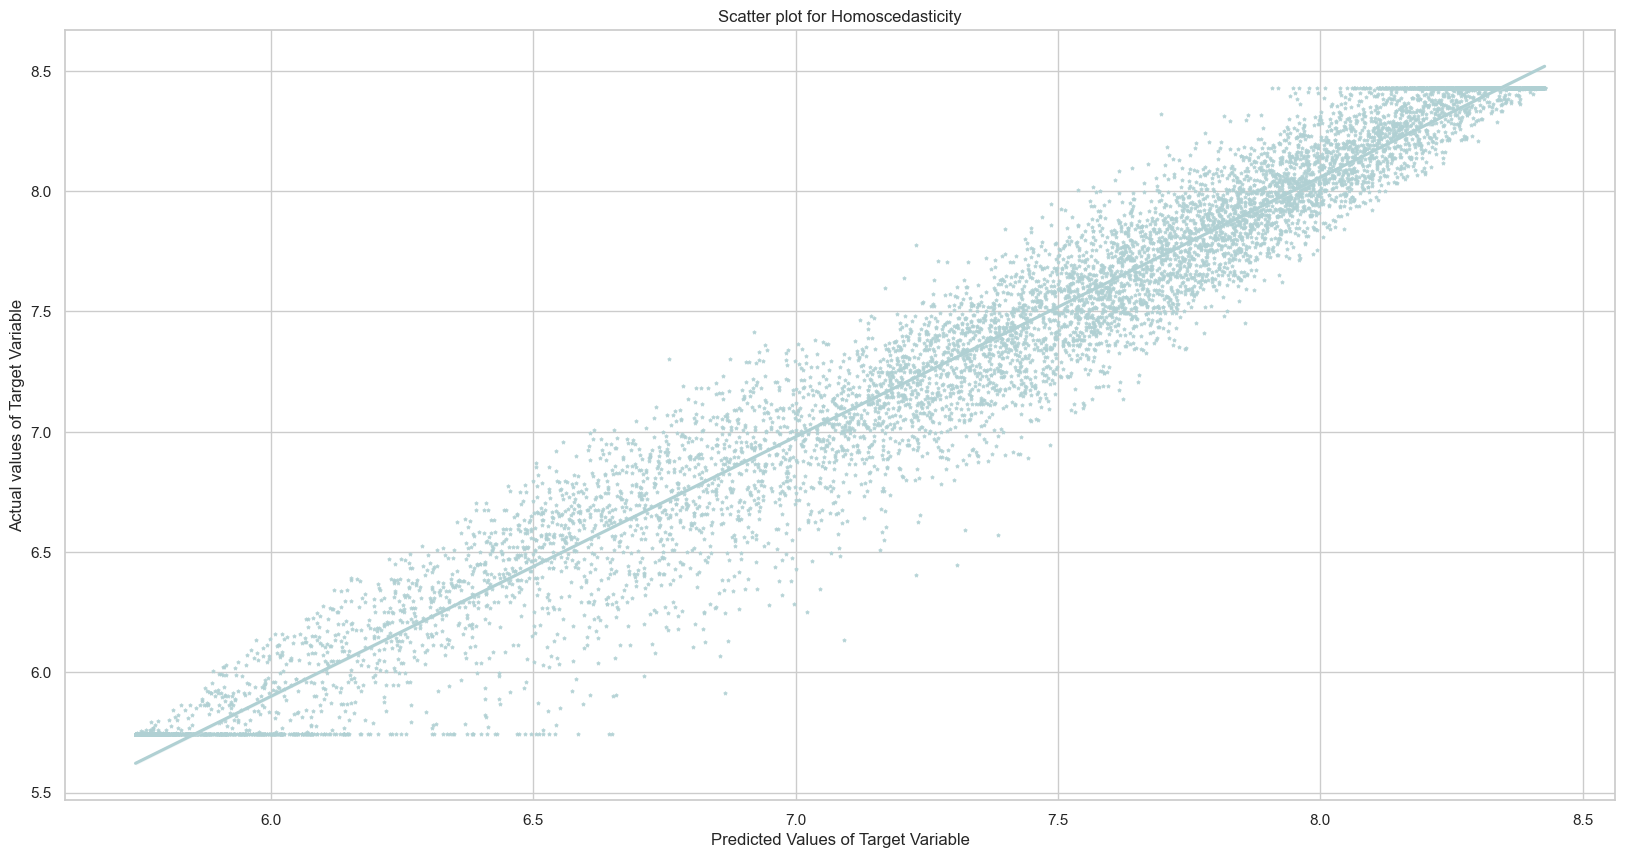

In [ ]:
plt.figure ( figsize = ( 20 , 10 ) )

sns.regplot ( x = Train_Y_RF , y = Train_Y , color = '#B0D0D3' , scatter_kws = { 's': 5 } , marker = '*' );
plt.xlabel ( "Predicted Values of Target Variable" );

plt.ylabel ( "Actual values of Target Variable" );
plt.title ( "Scatter plot for Homoscedasticity" );

#### CHECKING FOR ASSUMPTIONS FOR ORIGINAL DATA 

##### LINEARITY

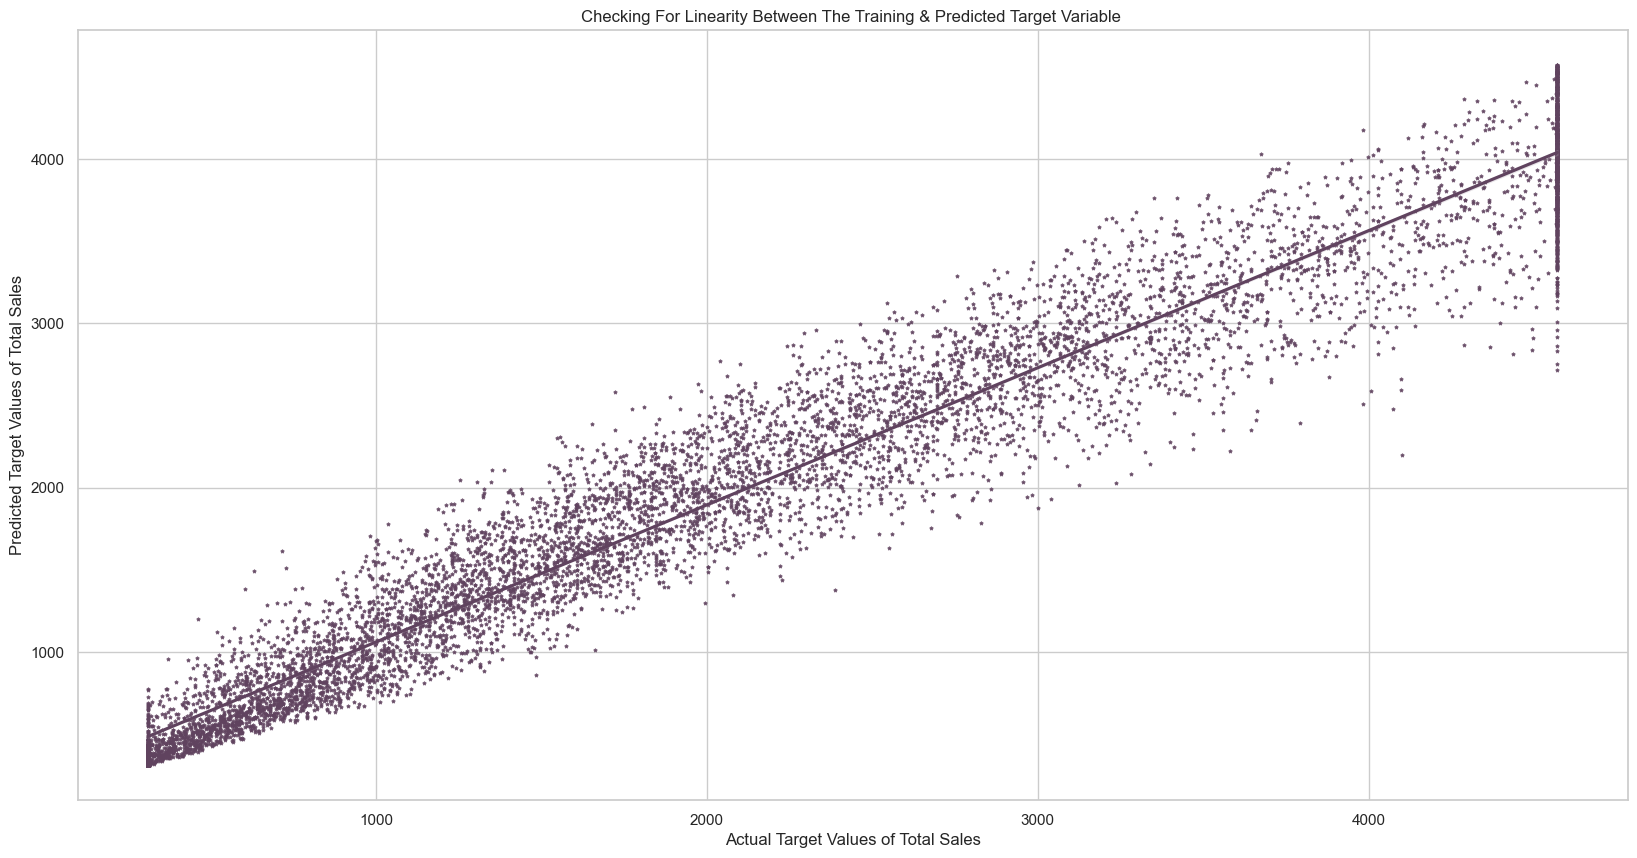

In [ ]:
plt.figure ( figsize = ( 20 , 10 ) )

sns.regplot ( x = np.exp ( Train_Y ) , y = Train_Y_RF_Original  , marker = '*', scatter_kws = { 's' : 5 }  , color = '#60435F' )
plt.title ( "Checking For Linearity Between The Training & Predicted Target Variable " )

plt.xlabel ( "Actual Target Values of Total Sales" )
plt.ylabel ( "Predicted Target Values of Total Sales" )

plt.show ( )

##### NORMALITY 

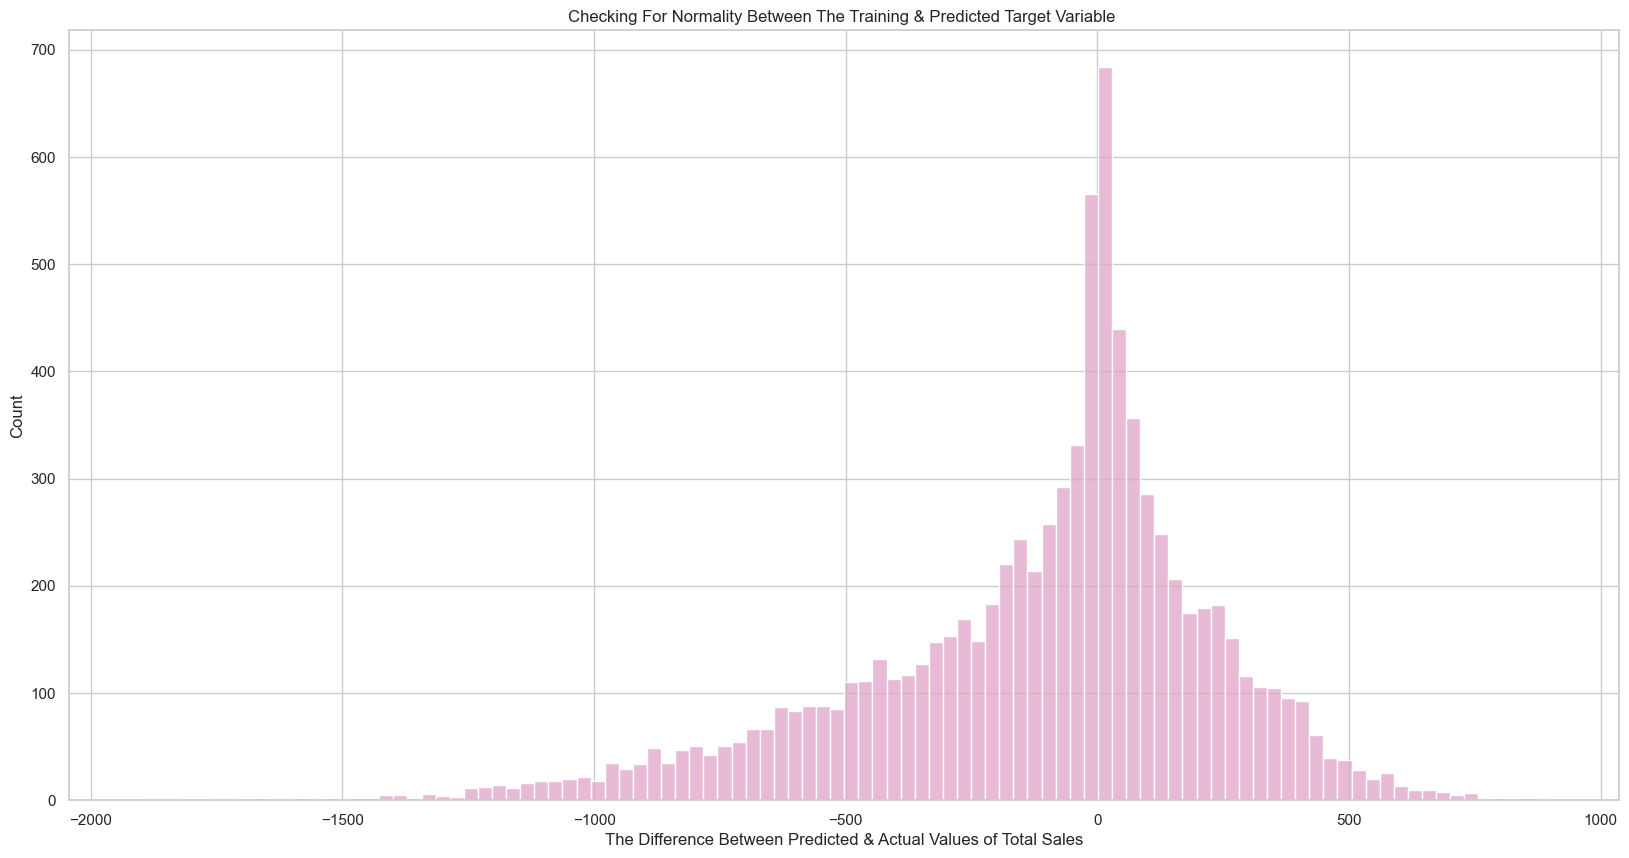

In [ ]:
plt.figure ( figsize = ( 20 , 10 ) )
sns.histplot ( data = ( Train_Y_RF_Original - np.exp ( Train_Y ) ) , color = '#E2A3C7' , bins = 100 )

plt.title ( "Checking For Normality Between The Training & Predicted Target Variable " )
plt.xlabel ( "The Difference Between Predicted & Actual Values of Total Sales" )

plt.show ( )

In [ ]:
Error_Train = Train_Y_RF_Original - np.exp ( Train_Y )

print ( "The skewness value of Train is : ", np.round ( Error_Train.skew ( ) , 2 ) )
print ( "\nThe kurtotis value of Train is : ", np.round ( Error_Train.kurt ( ) + 3 , 2 )  )

The skewness value of Train is :  -0.91

The kurtotis value of Train is :  4.24


##### HOMOSCEDASTICITY 

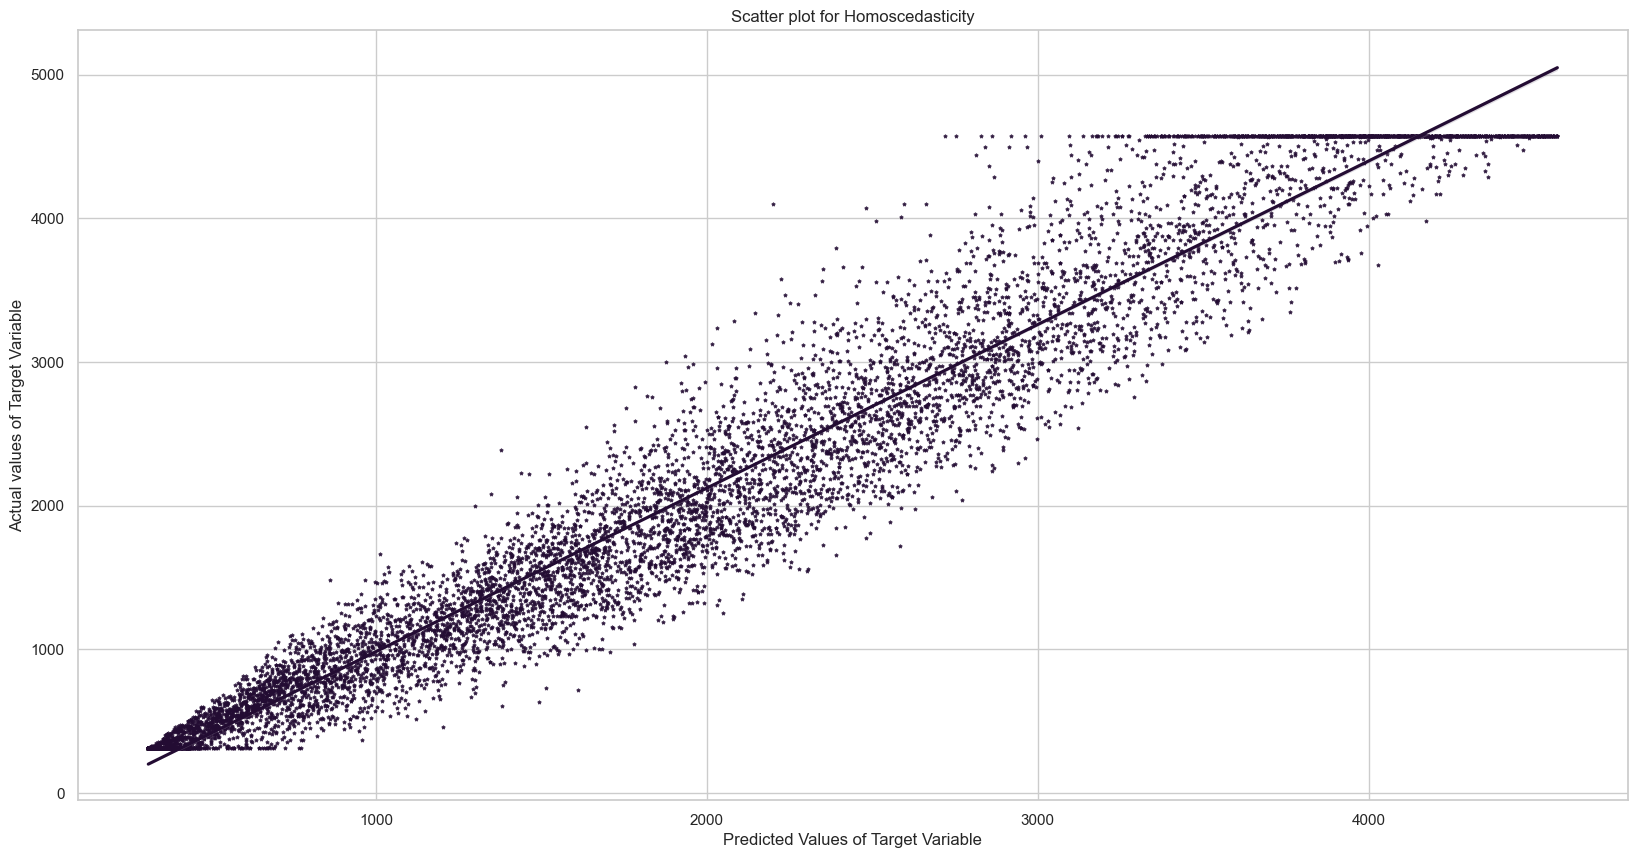

In [ ]:
plt.figure ( figsize = ( 20 , 10 ) )

sns.regplot ( x = Train_Y_RF_Original , y = np.exp ( Train_Y ) , color = '#230C33' , scatter_kws = { 's': 5 } , marker = '*' );
plt.xlabel ( "Predicted Values of Target Variable" );

plt.ylabel ( "Actual values of Target Variable" );
plt.title ( "Scatter plot for Homoscedasticity" );

    -- INFERENCE -- 
    
       Collectively, the data transformation improved the overall fit of the model, as indicated by higher R-squared and 
       adjusted R-squared values, and reduced prediction errors, as indicated by lower MSE, MAE, MAPE, and RMSE values.

In [29]:
Test.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,Fdh26,19.250000,Regular,0.034896,Canned,141.0496,Out017,2007,Medium,Tier 2,Supermarket Type1,1516.110262
1,Nca17,12.695633,Low Fat,0.045198,Health And Hygiene,150.2392,Out027,1985,Medium,Tier 3,Supermarket Type3,3175.072611


In [31]:
Test.Item_Identifier=Test.Item_Identifier.str.upper()
Test.Outlet_Identifier=Test.Outlet_Identifier.str.upper()

In [32]:
Test[['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales']].to_csv('Submission.csv',index=False)

In [32]:
# Y_RF = RF.predict ( Test_X_RF )
Y_RF.shape


(5681, 1)